# <a target="_blank" href="https://colab.research.google.com/github/zamaS24/DCP_Labs/blob/master/DCP_lab2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> LAB2: Speech Processing in Frequency domain Using Periodogram 

# 1. Basic signal characteristics
After recording my voice using this  [website](https://online-voice-recorder.com/fr/), we will calculate
- duration 
- sampling frequency 
- mean value 
- energy

In [1]:
! pip -q install librosa

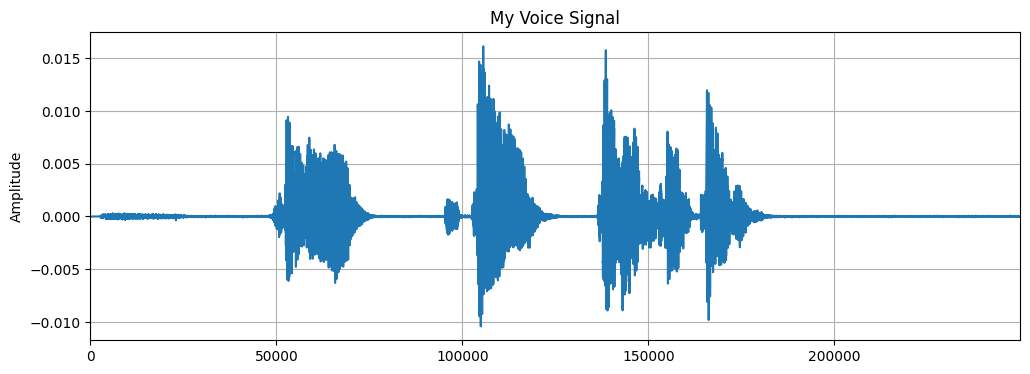

In [148]:
import os
import librosa 
import numpy as np 
import matplotlib.pyplot as plt


# if you are running this in colab you should put your own record file
record_path = os.path.join('record.mp3')
signal, fs = librosa.load(record_path, sr=None) 

plt.figure(figsize=(12, 4))
plt.plot(signal)  # I wil ignore the time axis, I only care about amplite
plt.title('My Voice Signal')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, len(signal))  
plt.show()

In [149]:
print('duration = ', signal.shape[0]*(1/fs), 's')
print('meas: ', np.mean(signal))
print('std :', np.std(signal))
print('Energy : ', np.sum(signal**2))

duration =  5.208 s
meas:  2.7926092e-07
std : 0.001494264
Energy :  0.5581704


# 2. Frequency Representation (Periodogram):
it is the distibution of power of a signal at a certain frequencies.


# 2.1 without windowing

In [150]:
from scipy.signal import periodogram

frequencies, power_spectral_density = periodogram(signal, fs)
print(frequencies.shape)
print(power_spectral_density.shape)

(124993,)
(124993,)


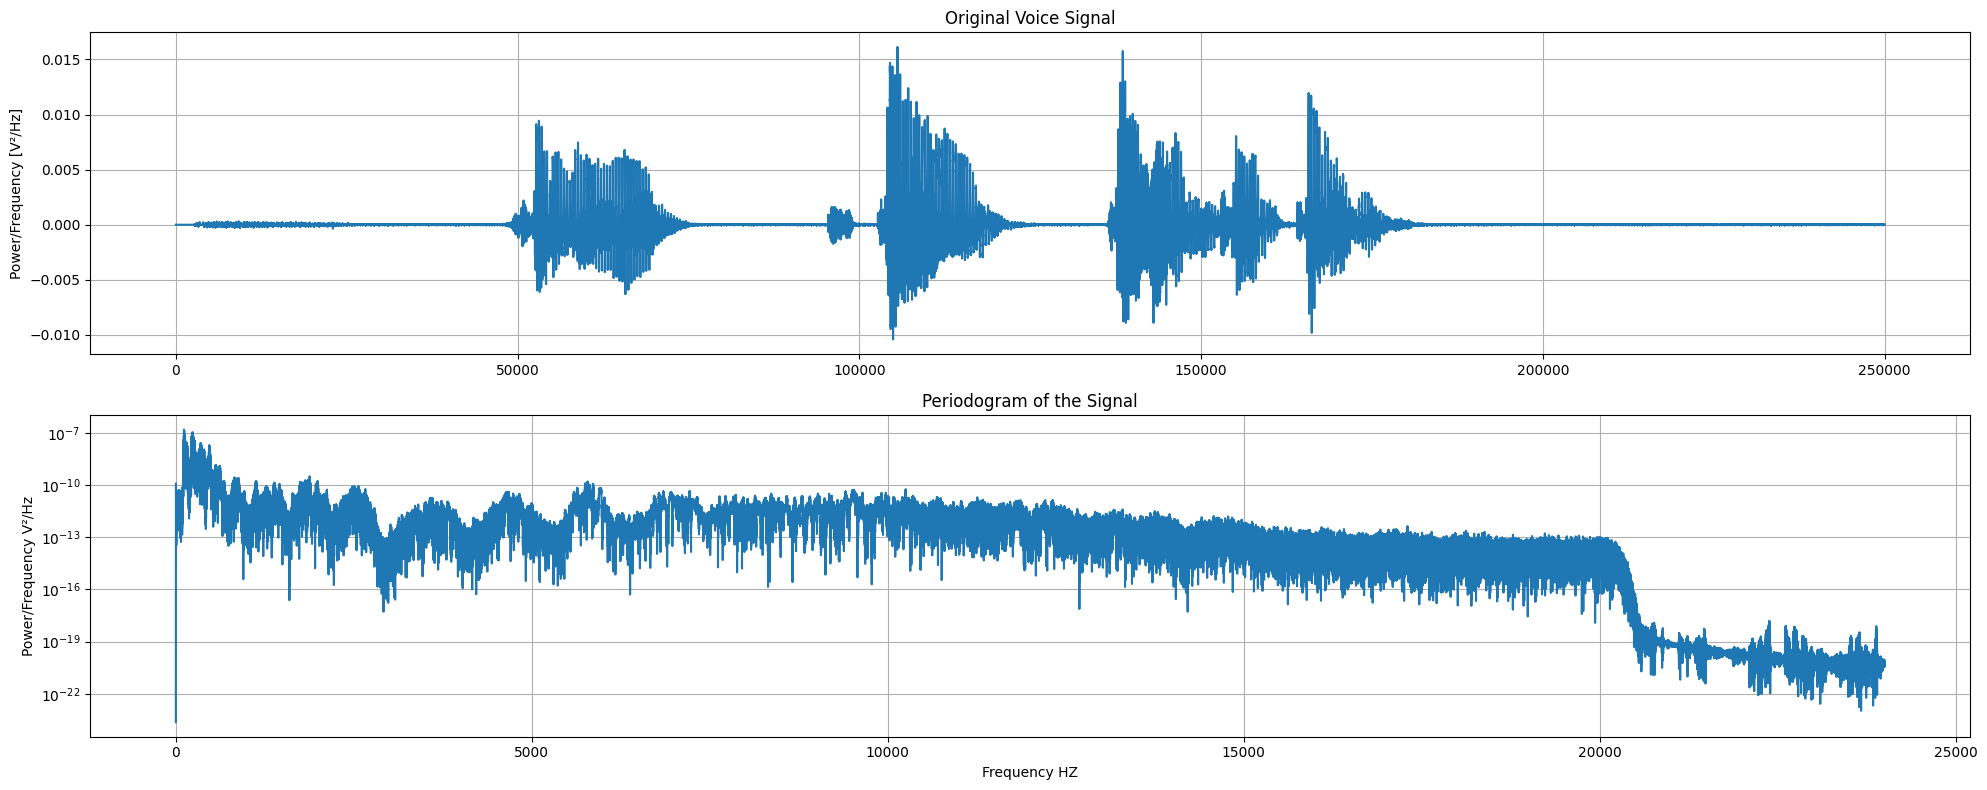

In [151]:
import matplotlib.pyplot as plt 


plt.figure(figsize = (20,8), dpi = 100)

plt.subplot(2,1,1)
plt.plot(signal)
plt.title('Original Voice Signal')
plt.ylabel('Power/Frequency [V²/Hz]')
plt.grid(True)

plt.subplot(2,1,2)
plt.semilogy(frequencies, power_spectral_density)
plt.title('Periodogram of the Signal')
plt.xlabel('Frequency HZ')
plt.ylabel('Power/Frequency V²/Hz')
plt.grid(True)

plt.tight_layout()
plt.show()

# 2.2 with windowing 

based on [this](https://fr.wikipedia.org/wiki/Fen%C3%AAtrage)
hamming and hann windows are just two formulas for generating an array when multiplied with the origian signal. it will make it smoothly start from zero and smoothly returns to zero 

## 2.2.1 Hamming

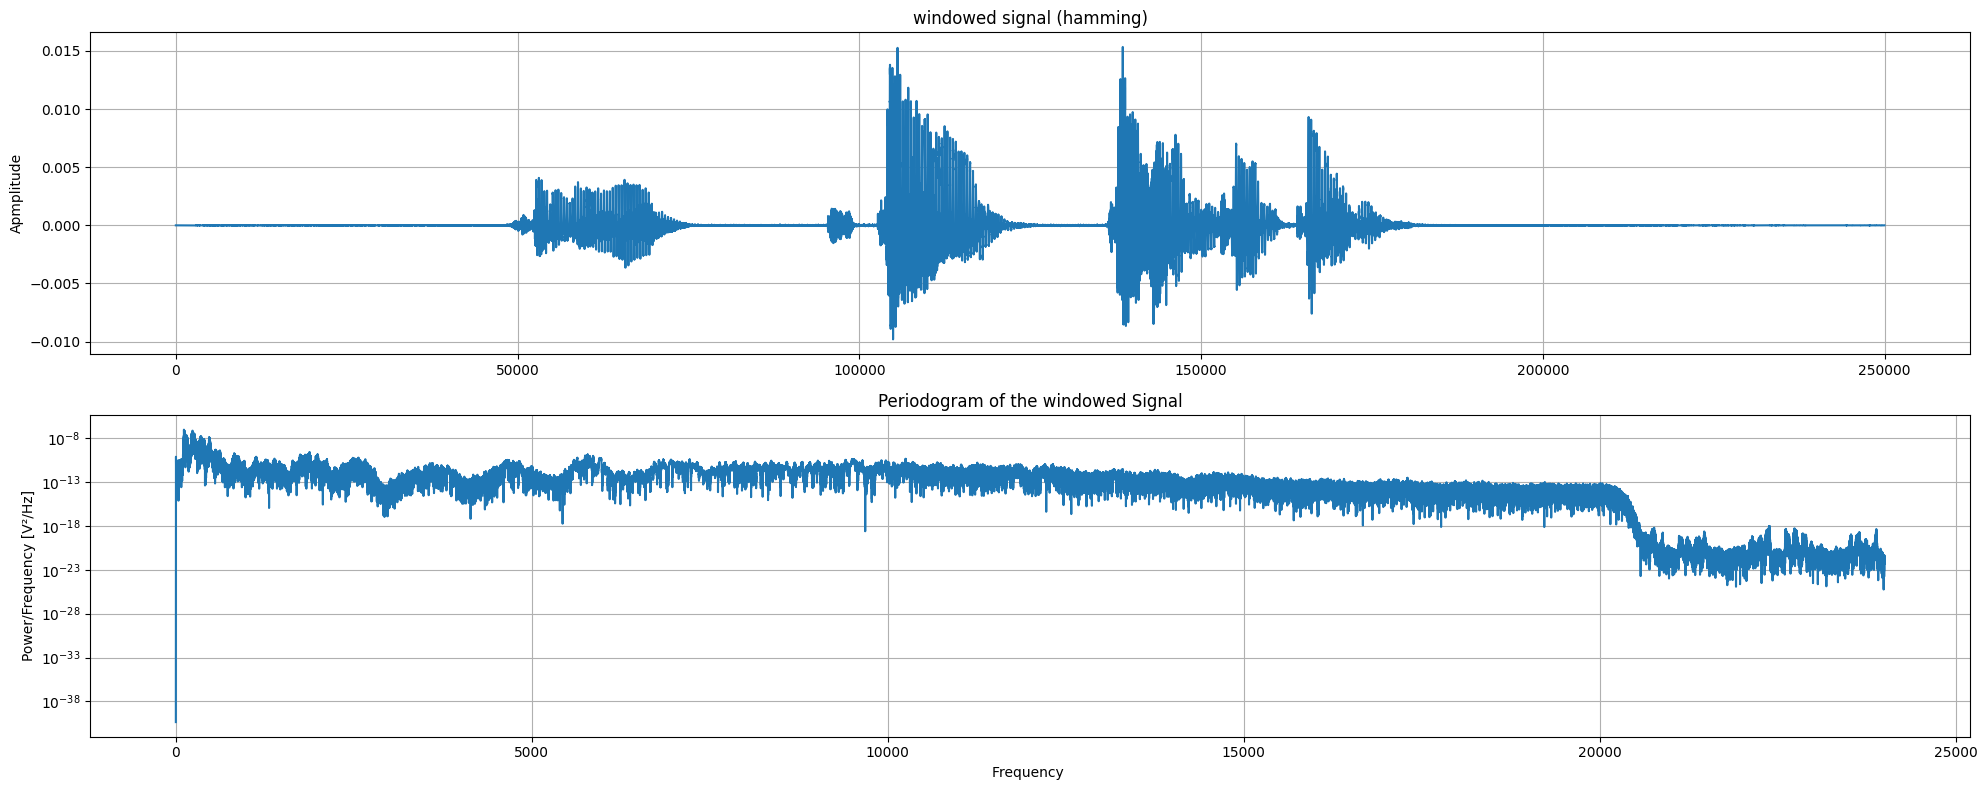

In [184]:
from scipy.signal import windows # this is not an operating system x) 


hamming_window = windows.hamming(len(signal))

# calculates the periodogram with windowing of hamming 
frequencies_window, power_spectral_density_window = periodogram(signal * hamming_window, fs)


plt.figure(figsize = (20,8), dpi = 100)

plt.subplot(2,1,1)
plt.plot(signal*hamming_window)
plt.title('windowed signal (hamming)')
plt.ylabel('Apmplitude')
plt.grid(True)


plt.subplot(2,1,2)
plt.semilogy(frequencies_window, power_spectral_density_window)
plt.title('Periodogram of the windowed Signal')
plt.xlabel('Frequency ')
plt.ylabel('Power/Frequency [V²/Hz]')
plt.grid(True)

plt.tight_layout()
plt.show()


## 2.2.2 Hann windowing 

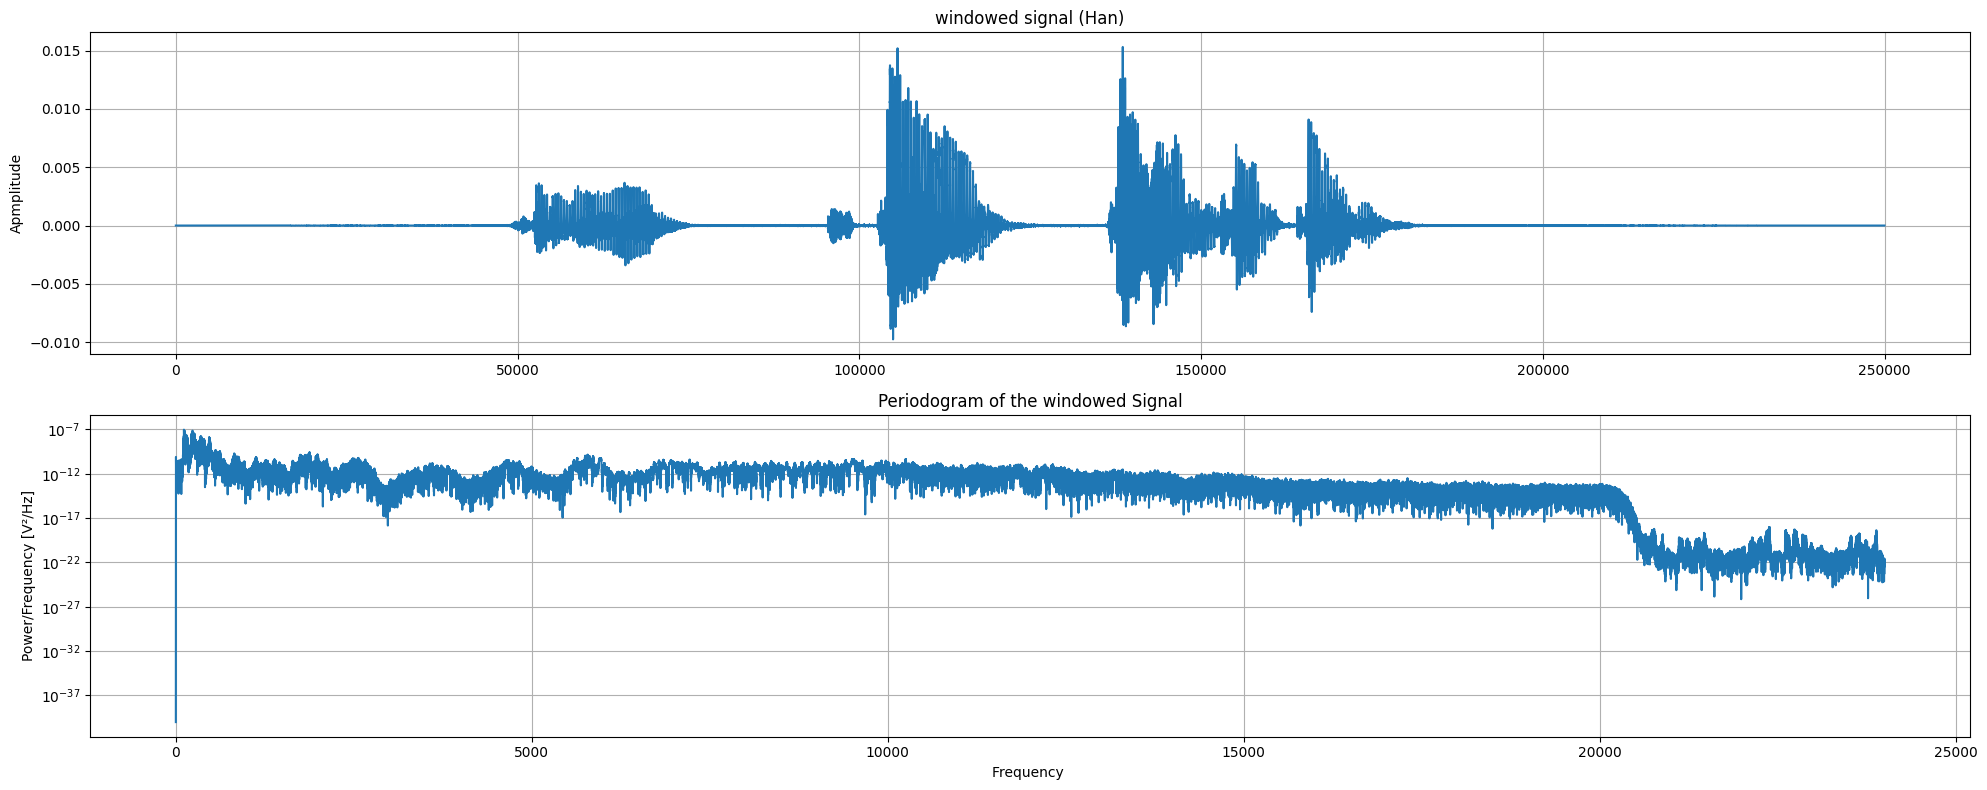

In [185]:
han_window = windows.hann(len(signal))
frequencies_window, power_spectral_density_window = periodogram(signal * han_window, fs)


plt.figure(figsize = (20,8), dpi = 100)

plt.subplot(2,1,1)
plt.plot(signal*han_window)
plt.title('windowed signal (Han)')
plt.ylabel('Apmplitude')
plt.grid(True)


plt.subplot(2,1,2)
plt.semilogy(frequencies_window, power_spectral_density_window)
plt.title('Periodogram of the windowed Signal')
plt.xlabel('Frequency ')
plt.ylabel('Power/Frequency [V²/Hz]')
plt.grid(True)



plt.tight_layout()
plt.show()



on the first plot we can see that the peaks in the spectrum are in the beginning, close to 10^-7.
we would try to plot them 


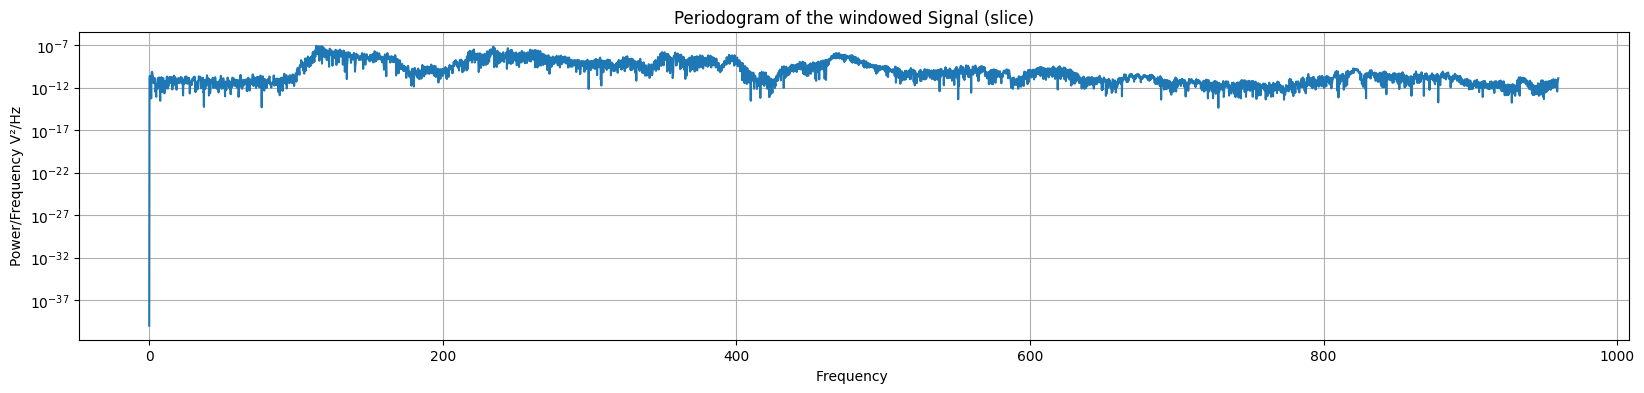

In [188]:
# visualize a slice of the signal, for more clear variations

plt.figure(figsize=(20,4), dpi=100)
plt.semilogy(frequencies_window[:5000], power_spectral_density_window[:5000])
plt.title('Periodogram of the windowed Signal (slice)')
plt.xlabel('Frequency ')
plt.ylabel('Power/Frequency V²/Hz')
plt.grid(True)

higher power from 150 to 400 Hzindicate that these frequencies are dominant frequencies in the signal, we can think of them that they are the frequencies that charactrizes our voice signal.


# 3. Effects of sampling and various window lengths

## 3.1 sampling

Signal is a: <class 'numpy.ndarray'>
Sampling frequency fs: 48.0 KHZ
The highest frequency that can be analyzed: 24.0 KHZ


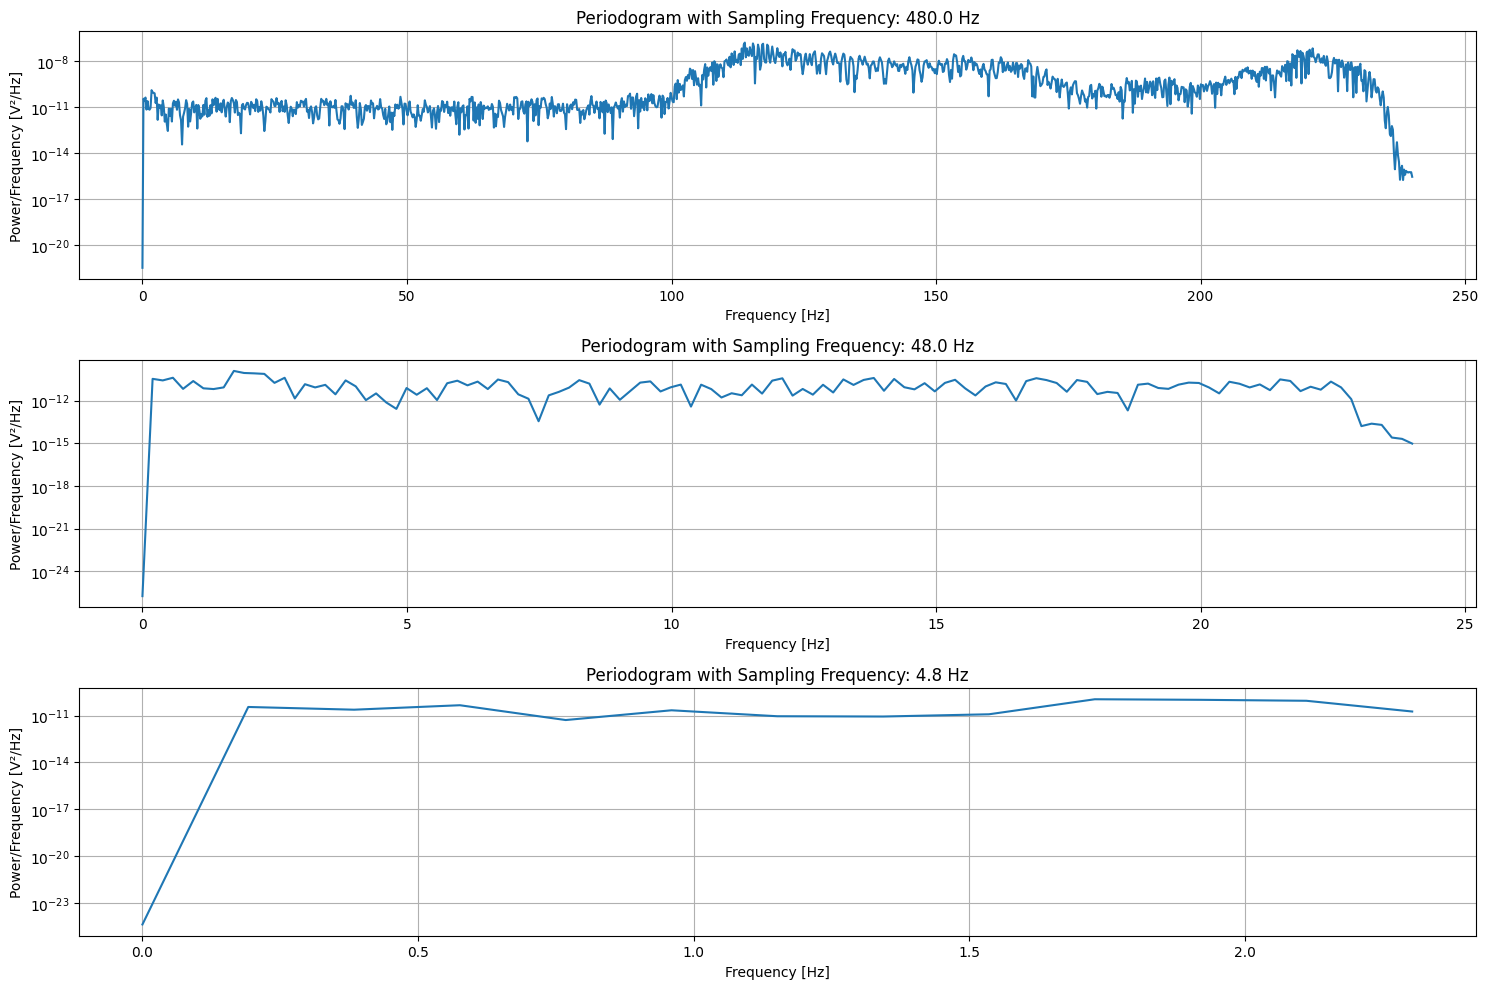

In [165]:
# seeing effects of sampling 


print('Signal is a:', type(signal))
print('Sampling frequency fs:', fs/1000, 'KHZ')
print('The highest frequency that can be analyzed:', fs/2000, 'KHZ')


sampling_frequencies = [fs/100,  fs/1000,  fs/10000]  

    
plt.figure(figsize=(15, 10))

for fs_new in sampling_frequencies:

    #  periodogram without windowing
    signal, fs = librosa.load(record_path, sr=fs_new) 
    frequencies, power_density = periodogram(signal, fs=fs_new)

    plt.subplot(len(sampling_frequencies), 1, sampling_frequencies.index(fs_new) + 1)
    plt.semilogy(frequencies, power_density)
    plt.title(f'Periodogram with Sampling Frequency: {fs_new} Hz')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power/Frequency [V²/Hz]')
    plt.grid()

plt.tight_layout()
plt.show()

## 3.2 Varying window lengths

Window Length: 49996, Frequency Resolution: 0.96 Hz
Window Length: 24998, Frequency Resolution: 1.92 Hz
Window Length: 12499, Frequency Resolution: 3.84 Hz
Window Length: 2499, Frequency Resolution: 19.21 Hz
Window Length: 249, Frequency Resolution: 192.77 Hz


C:\Users\monms\AppData\Local\Temp\ipykernel_20520\3781772647.py:31: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


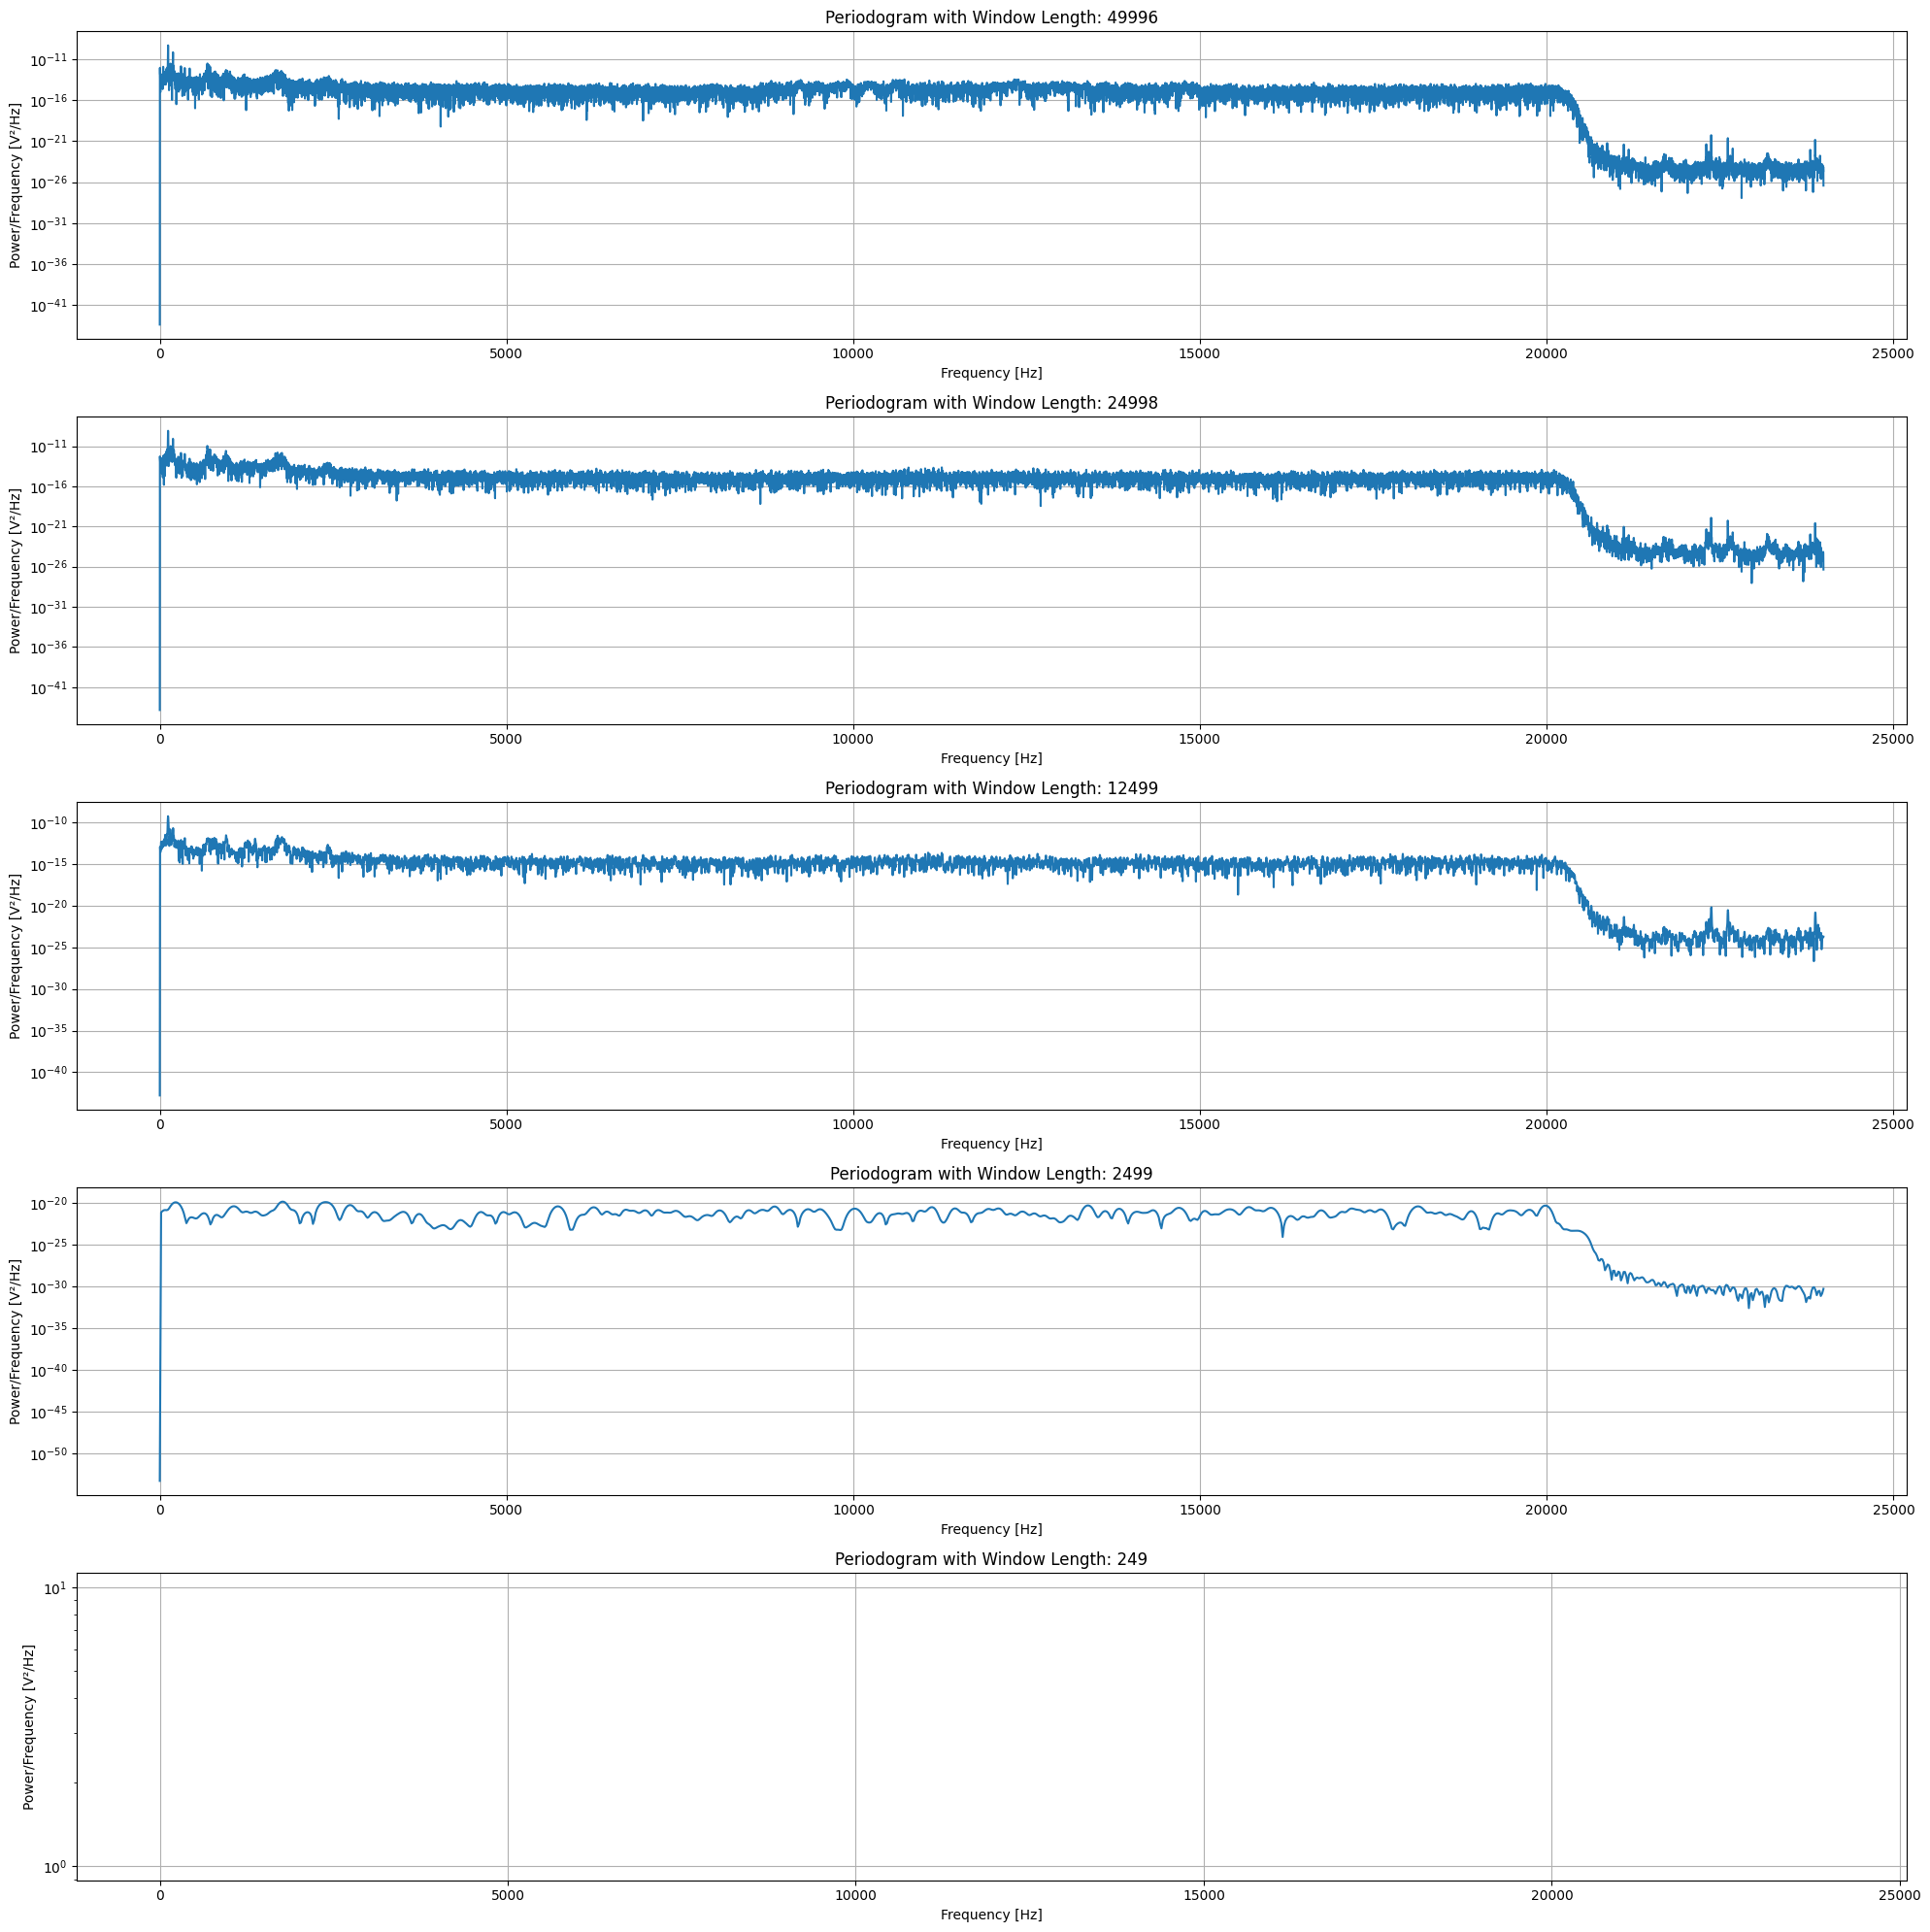

In [182]:
# loading with its original fs
record_path = os.path.join('record.mp3')
signal, fs = librosa.load(record_path, sr=None) 

# setting differnet lengths
window_lengths = [len(signal)//5, len(signal)//10, len(signal)//20, len(signal)//100, len(signal)//1000]

# plotting them 
plt.figure(figsize=(20, 20))

for window_length in window_lengths:

    
    window = windows.hann(window_length)

    
    segment = signal[:window_length]  # Take the first 'window_length' samples (slicing)
    frequencies_window, power_spectral_density_window = periodogram(segment * window, fs=fs)

    # Frequency resolution
    # TODO:  A vérifier :  fs/window_length

    frequency_resolution = fs / window_length
    print(f'Window Length: {window_length}, Frequency Resolution: {frequency_resolution:.2f} Hz')

    plt.subplot(len(window_lengths), 1, window_lengths.index(window_length) + 1)
    plt.semilogy(frequencies_window, power_spectral_density_window)
    plt.title(f'Periodogram with Window Length: {window_length}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power/Frequency [V²/Hz]')
    plt.grid()

plt.tight_layout()
plt.show()

# IGNORE THIS SECTION? ITS JUST FOR TESTING PURPOSES   : creating a random signal and verifying and documenting about some functions
- we will create a signal that composes of two sinus signals of well known frequencies, and we will sample it 1000 times in one second.   
- perform FFT and visualize it and see if we will get the two frequencies with the corresponding values   
-  perform periodogram and seeing results 

In [189]:
import numpy as np
import matplotlib.pyplot as plt


# creating a discrete signal that composes of two A*sin(2pift), with a fs = 1000
fs = 1000
step = 1.0 / fs  

# creating x 
t = np.arange(0, 0.1, step)  # array de 0 a 1 with steps of one step at a time
print('shape of t', t.shape)

f1 = 200
f2 = 400

# creating y 
signal = 0.5 * np.sin(2 * np.pi * f1 * t) + 0.2 * np.sin(2 * np.pi * f2 * t)

# Pour la FFT
N = len(signal)  

yf = np.fft.fft(signal)  
xf = np.fft.fftfreq(N, step)  

print('shape of yf', yf.shape)
print('shape of xf', xf.shape)

shape of t (100,)
shape of yf (100,)
shape of xf (100,)


In [190]:
# how is that even posisbleinthemean time okay ?
xf[2]


20.0

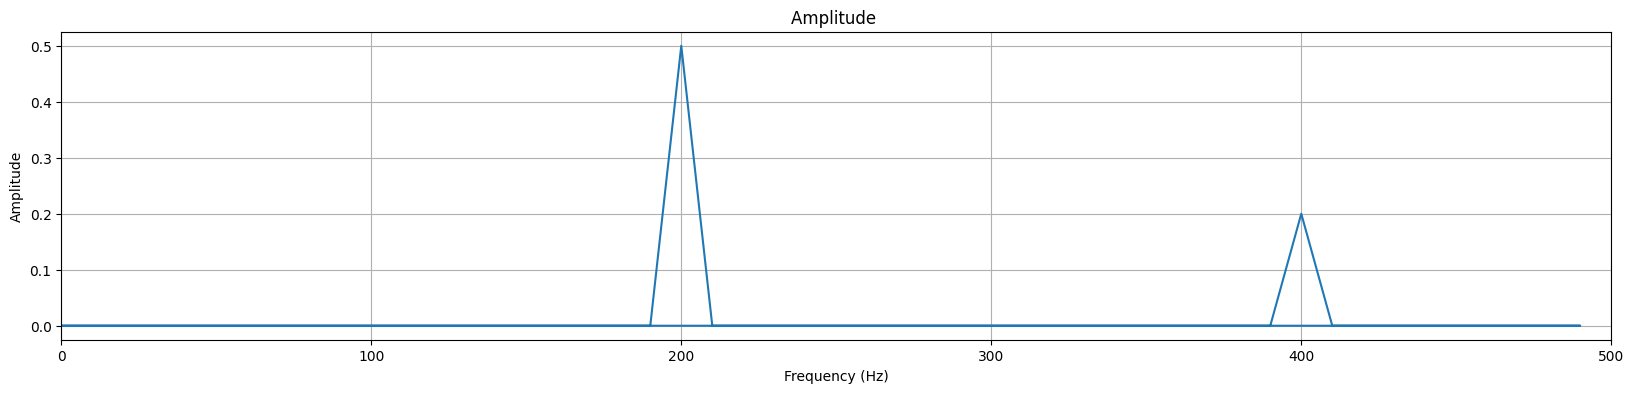

In [191]:
# Only take the positive half of the spectrum
xf = xf[:]
amplitude = np.abs(yf)[:] * (2.0 / N)  # Amplitude (normalized)

# Plotting
plt.figure(figsize = (20,4), dpi = 100)
plt.plot(xf, amplitude)
plt.title('Amplitude ')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, fs/2)  
plt.show()

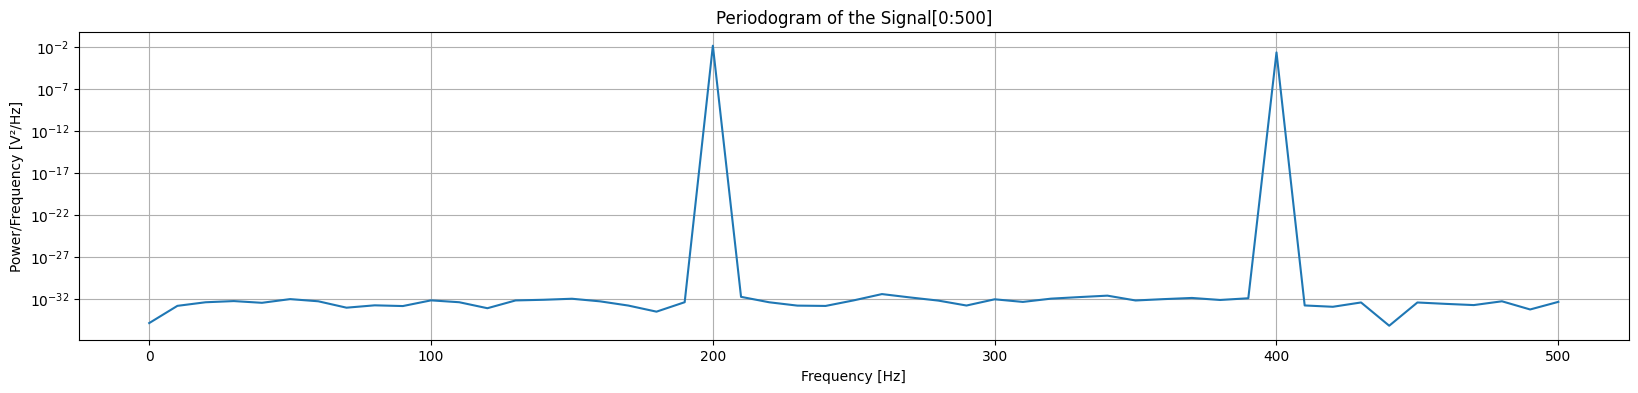

In [192]:
frequencies, power_spectral_density = periodogram(signal, fs)

plt.figure(figsize = (20,4), dpi = 100)
plt.semilogy(frequencies, power_spectral_density)
plt.title('Periodogram of the Signal[0:500]')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/Frequency [V²/Hz]')
plt.grid(True)
plt.show()

> ⚠️ I don't understand why other frequences, having some values, and we know that the signal is composed of two sinus only of frequencies f1 = 50 and f2= 120

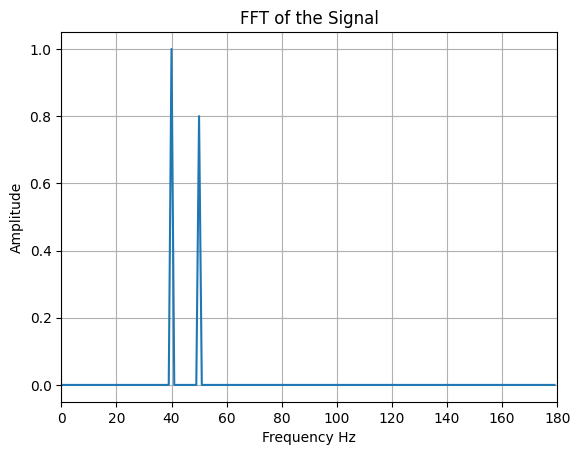

In [199]:
# Parameters
fs = 360  # sampling frequency
N = 360  
# changing this number of samples to 362 for example, will give us something not nice, this is especially because of the discontinuity problem and it doens't end exactly where it starts I guess

T = 1.0 / fs  # step in the axis time, genre one unit

# generating a sample signal
t = np.arange(0, N) * T
signal = 0.8 *np.sin(2 * np.pi * 50 * t) + 1*np.sin(2 * np.pi * 40* t)

#  FFT
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, T)


# Plotting  
plt.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]))  # Plotting only positive frequencies that's why we do 2*|FFT|/N
plt.title('FFT of the Signal')
plt.xlabel('Frequency Hz')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, fs/2)  # Limit x-axis to Nyquist frequency
plt.show()

In [194]:
xf

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

In [195]:
idx = np.where(xf == 40)
2.0/N * np.abs(yf[idx])

array([1.])

In [196]:
xf
idx = np.where(xf == 40)[0]
yf[idx] * 2 / N


array([-5.96777463e-16-1.j])

In [197]:
yf

array([ 9.92003849e-14+0.00000000e+00j,  3.05850647e-14-8.34643286e-14j,
        4.76895169e-15-9.72555370e-14j,  3.47566464e-13+2.16016814e-13j,
       -2.03220344e-14+1.16213389e-13j, -1.50069381e-13+1.00638081e-13j,
        2.57677757e-13-4.26325641e-14j, -3.29860773e-15+3.87796801e-13j,
       -2.97655800e-13+1.50990331e-13j, -6.13962102e-14+1.31788942e-14j,
       -1.82521238e-13+7.01622811e-14j, -1.17556261e-13-1.77613705e-13j,
       -7.94769018e-14-2.18390647e-14j,  5.57775145e-14-2.01056779e-13j,
       -2.81702009e-14+1.29545383e-13j, -2.59884804e-14+1.12239591e-13j,
        7.49350468e-14-1.75859327e-13j, -4.62775508e-14+3.23892148e-13j,
       -4.30023894e-13-5.30245663e-14j,  6.38406333e-14-3.07287347e-13j,
        1.83181138e-14-2.51731940e-14j,  2.58723062e-14-1.47308427e-13j,
       -1.15382462e-14+1.42108547e-13j,  8.13993178e-14-1.08571410e-13j,
       -2.02289655e-13+1.15321021e-13j, -5.85150542e-14-2.38887743e-14j,
        1.14347341e-14-2.17911237e-13j,  4.69592603

In [198]:
idx = -2

yf[-idx]

(4.768951689903222e-15-9.725553695716371e-14j)

🖋️ NOTES :  
About the FFT in numpy 
- xf has both negative and positives frequencies  
- yf same thing has the complex numbers from wich we can get the amplitudes 
- we should only take N/2, because they are symmetrical  
- len(xf) = len(yf) = Number of samples  
- the resolution depends on N , resolution = fs/N   

Why windowing : 
- [this link](https://stackoverflow.com/questions/5418951/what-is-the-hamming-window-for#:~:text=Computers%20can't%20do%20computations,the%20original%20signal's%20frequency%20spectrum. )
    